In [15]:
import pandas as pd
import numpy as np
import pysindy as ps
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso

In [16]:
# t = pd.read_csv (r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-fit\data-62-t.csv')
# x = pd.read_csv (r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-fit\data-62-x.csv')
# xdot = pd.read_csv (r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-fit\data-62-x.csv')
# t = pd.read_csv (r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-fit\data-63-t.csv')
# x = pd.read_csv (r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-fit\data-63-x.csv')
# xdot = pd.read_csv (r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-fit\data-63-x.csv')

t = pd.read_csv (r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-fit\data-12-t.csv')
x = pd.read_csv (r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-fit\data-12-x.csv')
xdot = pd.read_csv (r'C:\Users\l2016\GitHub\nonlinear-brain-mass-model\data-fit\data-12-x.csv')

t = t.to_numpy() #0 to 1000
x = x.to_numpy() #1039 by 16
xdot = xdot.to_numpy()
# print(x.shape[0])
# print(type(x))
#print(x[:,2])

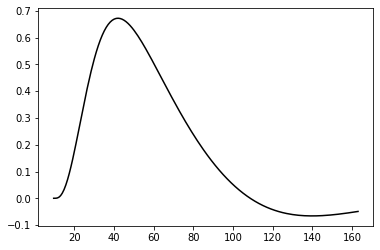

In [21]:
cl1 = x[20:200,1] - x[20:200,2]
plt.plot(t[20:200], cl1,'k')

In [22]:
#the case 1 with one column 
#
#create the training data
#index = math.floor(len(t)/2)#519
index = 160
t_train = t[20: index]
#training data
x_train = x [20:index]
x_dot_train = xdot [20:index]
print(x_train.shape)
#it also need to y term which is x 2nd column - 3rd column
y = x[20:index,1] - x[20:index,2]
# test
#I will try to include u as one of the training input as well
u =

(140, 8)


In [ ]:
#I will initial with only 2 functions one is x 
# the other is the sigmoid-liked function
library_functions = [
    lambda x : x,
    lambda x : -2.5+5/(1+exp(-0.56*x)) #-e0+2*e0/(1+exp(-r*x))
]
library_function_names = [
    lambda x : x,
    lambda x : 'S(' + x + ')'
]

custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

In [117]:
#pass the x and its derivative
optimizer = ps.SR3(threshold=0.001)


feature_library=custom_library


model = ps.SINDy(
    feature_library=feature_library,
    optimizer=optimizer
)
model.fit(x_train, t=t_train, x_dot=x_dot_train)
model.print()

(x0)' = 1.000 x0
(x1)' = 1.000 x1
(x2)' = 1.000 x2
(x3)' = 1.000 x3
(x4)' = 1.000 x4
(x5)' = 1.000 x5
(x6)' = 1.000 x6
(x7)' = 1.000 x7
(x8)' = 1.000 x8
(x9)' = 1.000 x9
(x10)' = 1.000 x10
(x11)' = 1.000 x11
(x12)' = 1.000 x12
(x13)' = 1.000 x13
(x14)' = 1.000 x14
(x15)' = 1.000 x15


In [110]:
print('Model score: %f' % model.score(x_train))

Model score: -706.253315


In [111]:
#simulate the result
dt = 0.5
t_test = np.arange(0, 450, dt)
x0_test = np.zeros(8)
x_test_sim = model.simulate(x0_test, t_test)

KeyboardInterrupt: 

In [ ]:
print(x_test_sim.shape[0])
cl1_sim = x_test_sim[:,1] - x_test_sim[:,2]
#cl2_sim = x_test_sim[:,9] - x_test_sim[:,10]

print(cl1_sim.shape)
#print(cl2_sim.shape)

In [ ]:
cl1 = x[:,1] - x[:,2]
#cl2 = x[:,9] - x[:,10]

#print(cl1)
#print(cl2.shape)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(7, 9))
ax[0].plot(t, cl1,'k')
ax[1].plot( t_test, cl1_sim, 'r--')
ax[0].legend(['Cln 1','Cln 1_predicted'])
#ax[1].plot(t, cl2,'k', t_test, cl2_sim, 'r--')
#ax[1].legend(['Cln 2','Cln 2_predicted'])